In [1]:
import  numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
usa_housing_df=pd.read_csv('C:\\Users\\preet\\Downloads\\USA_Housing.csv')

In [3]:
usa_housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
usa_housing_df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
usa_housing_df.columns.values

array(['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price', 'Address'], dtype=object)

In [7]:
usa_housing_df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
usa_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


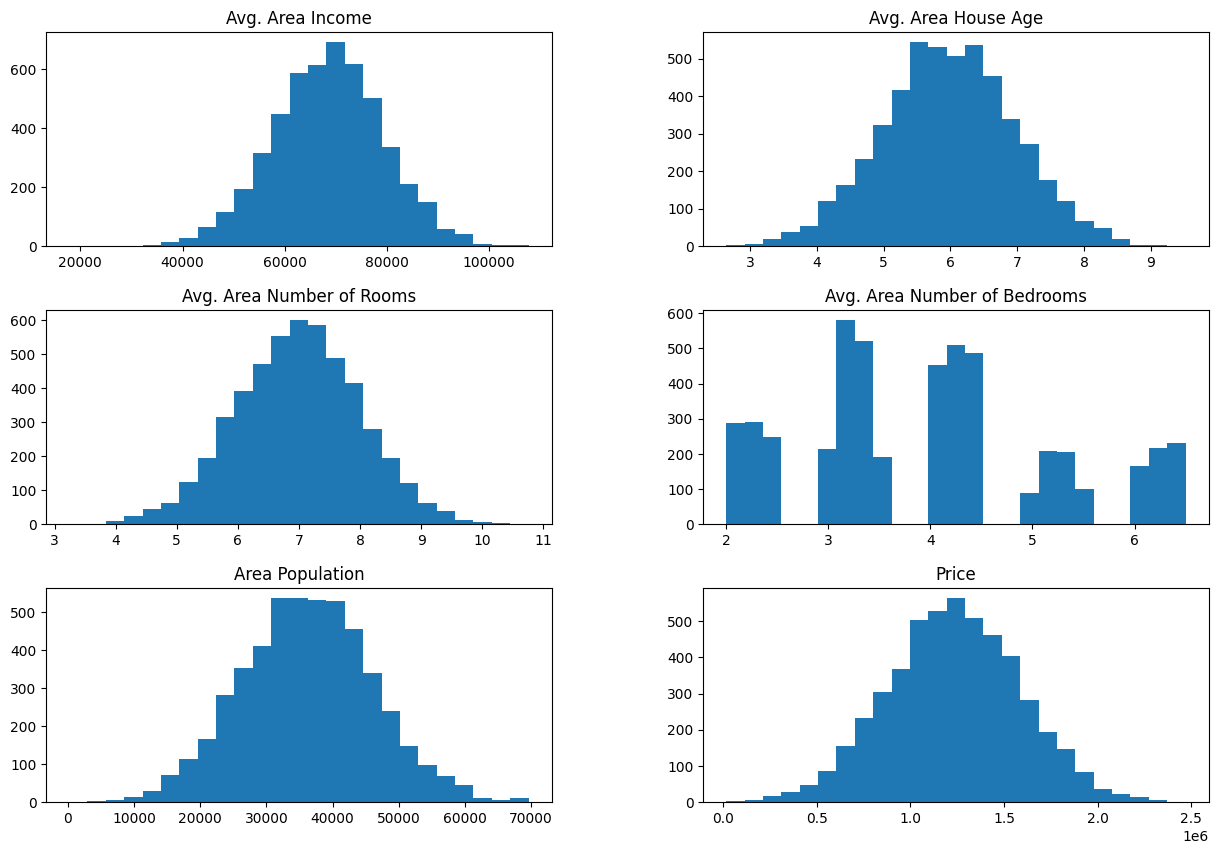

In [9]:
usa_housing_df.hist(bins = 25,grid = False, figsize =(15,10));

In [10]:
usa_housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [11]:
questions = ["1.What is the distribution of house prices?",
             "2.What is the average area income for different house age ranges?",
             "3.How does the number of rooms correlate with house price?",
             "4.What is the relationship between area population and house price?"]
questions

['1.What is the distribution of house prices?',
 '2.What is the average area income for different house age ranges?',
 '3.How does the number of rooms correlate with house price?',
 '4.What is the relationship between area population and house price?']

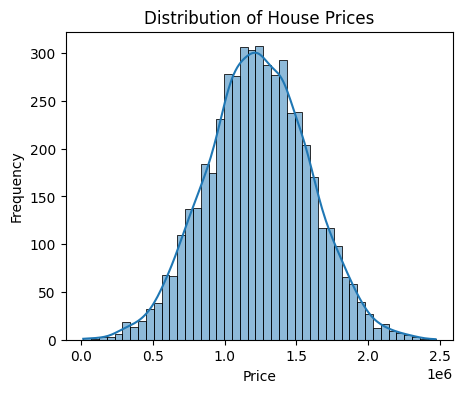

In [24]:
#"1.What is the distribution of house prices?"
plt.figure(figsize=(5, 4))
sns.histplot(usa_housing_df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [13]:
#"2.What is the average area income for different house age ranges?"
# Create age ranges
usa_housing_df['House Age Range'] = pd.cut(usa_housing_df['Avg. Area House Age'], bins=[0, 5, 10, 15, 20, 25, 30])

In [14]:
# Calculate average area income for different house age ranges
avg_income_by_age_range = usa_housing_df.groupby('House Age Range')['Avg. Area Income'].mean()
print(avg_income_by_age_range)

House Age Range
(0, 5]      68479.499862
(5, 10]     68603.079444
(10, 15]             NaN
(15, 20]             NaN
(20, 25]             NaN
(25, 30]             NaN
Name: Avg. Area Income, dtype: float64


C:\Users\preet\AppData\Local\Temp\ipykernel_8820\2968488036.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_age_range = usa_housing_df.groupby('House Age Range')['Avg. Area Income'].mean()


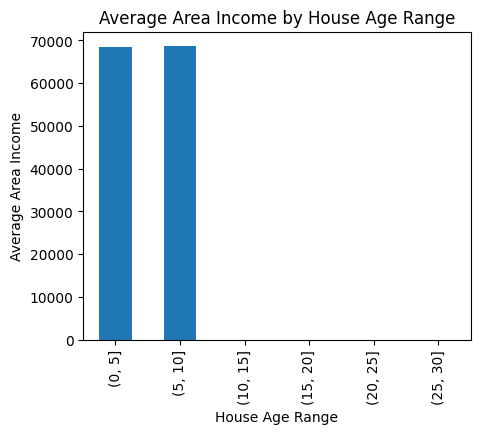

In [23]:
# Plot the average area income by house age range
plt.figure(figsize=(5, 4))
avg_income_by_age_range.plot(kind='bar')
plt.title('Average Area Income by House Age Range')
plt.xlabel('House Age Range')
plt.ylabel('Average Area Income')
plt.show()

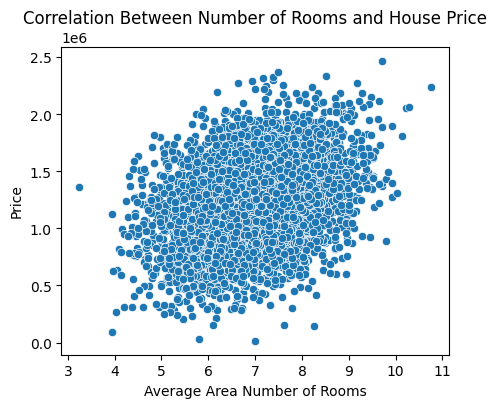

In [22]:
#'3.How does the number of rooms correlate with house price?'
# Plot the correlation between the number of rooms and house price
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Avg. Area Number of Rooms', y='Price', data=usa_housing_df)
plt.title('Correlation Between Number of Rooms and House Price')
plt.xlabel('Average Area Number of Rooms')
plt.ylabel('Price')
plt.show()

In [17]:
# Calculate the correlation coefficient
correlation_rooms_price = usa_housing_df['Avg. Area Number of Rooms'].corr(usa_housing_df['Price'])
print(f'Correlation coefficient between number of rooms and house price: {correlation_rooms_price}')

Correlation coefficient between number of rooms and house price: 0.3356644533667597


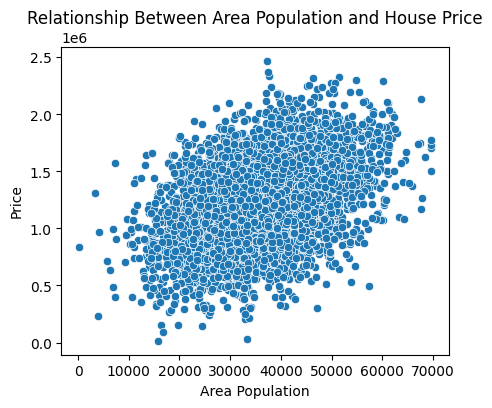

In [20]:
# "4.What is the relationship between area population and house price?"
# Plot the relationship between area population and house price
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Area Population', y='Price', data=usa_housing_df)
plt.title('Relationship Between Area Population and House Price')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.show()

In [19]:
# Calculate the correlation coefficient
correlation_population_price = usa_housing_df['Area Population'].corr(usa_housing_df['Price'])
print(f'Correlation coefficient between area population and house price: {correlation_population_price}')

Correlation coefficient between area population and house price: 0.4085558793165563
